In [1]:
# pip install yfinance

In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-7, end.month, end.day)

In [4]:
stock = "TCS.NS"
TCS_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
TCS_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-12,1248.500000,1256.449951,1235.199951,1243.599976,1068.501831,1626506
2017-06-13,1232.500000,1240.550049,1223.500000,1225.775024,1064.961670,1175414
2017-06-14,1227.500000,1238.000000,1227.500000,1235.099976,1073.063354,1489142
2017-06-15,1234.500000,1234.849976,1202.500000,1205.599976,1047.433472,2997198
2017-06-16,1207.474976,1217.500000,1193.250000,1199.849976,1042.437744,2450426


In [6]:
TCS_data.shape

(1727, 6)

In [7]:
TCS_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1.727000e+03
mean,2675.316357,2701.170218,2648.134416,2674.454907,2512.638762,2.806011e+06
std,839.112852,844.282526,833.016593,838.845122,869.258194,2.717279e+06
min,1162.199951,1178.224976,1161.550049,1165.974976,1013.007080,8.682200e+04
25%,2001.049988,2018.700012,1980.674988,2000.900024,1788.512329,1.684580e+06
50%,2811.000000,2829.850098,2780.250000,2810.800049,2622.071289,2.317618e+06
75%,3383.000000,3407.375000,3355.800049,3381.425049,3264.168579,3.257660e+06
max,4215.250000,4254.750000,4177.000000,4219.250000,4188.805176,8.806715e+07


In [8]:
#TCS_data.info()

In [9]:
TCS_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of TCS data')

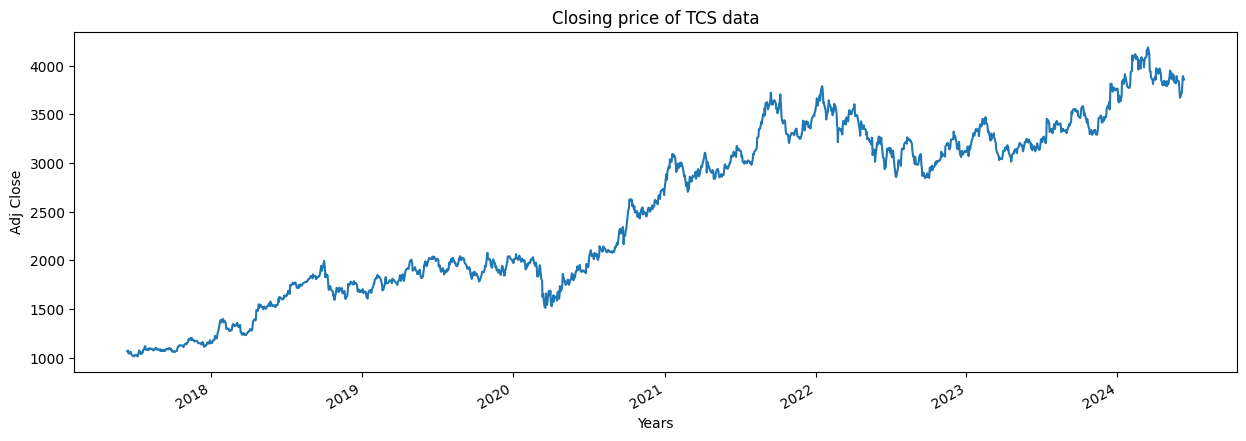

In [11]:
plt.figure(figsize = (15,5))
TCS_data['Adj Close'].plot()
plt.xlabel("Years")
plt.ylabel("Adj Close")
plt.title("Closing price of TCS data")

In [12]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of TCS data")
    

In [13]:
TCS_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [14]:
#for column in TCS_data.columns:
   # plot_graph((15,5),TCS_data[column], column)

In [15]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [16]:
#temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#print(sum(temp_data[1:6])/5)

In [17]:
#import pandas as pd
#data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
#data.head()

In [18]:
#data['MA'] = data.rolling(5).mean()
#data

In [19]:
#for i in range(2019,2025):
    #print(i,list(TCS_data.index.year).count(i))

In [20]:
TCS_data['MA_for_250_days'] = TCS_data['Adj Close'].rolling(250).mean()

In [21]:
TCS_data['MA_for_250_days'][0:250].tail()

Date
2018-06-06            NaN
2018-06-07            NaN
2018-06-08            NaN
2018-06-11            NaN
2018-06-12    1221.948128
Name: MA_for_250_days, dtype: float64

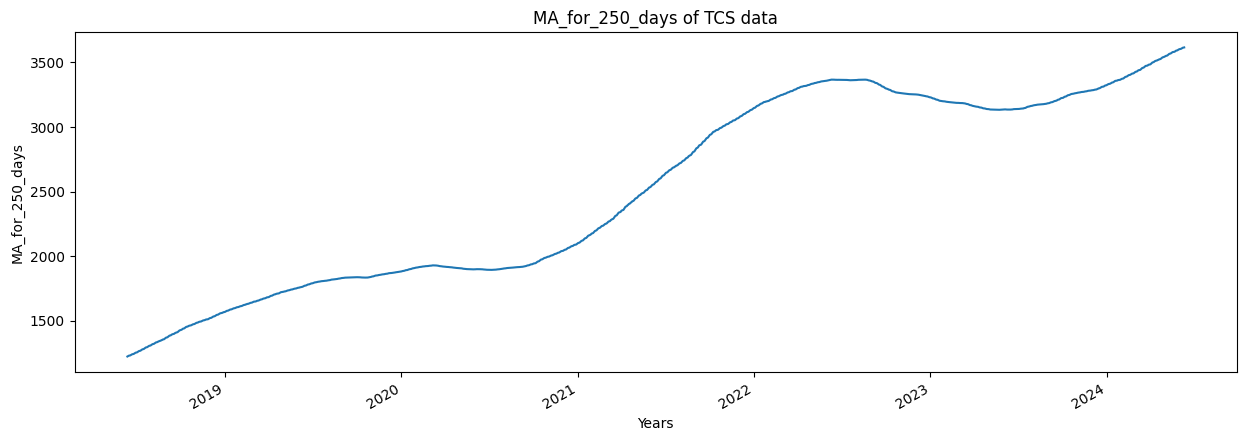

In [22]:
plot_graph((15,5), TCS_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

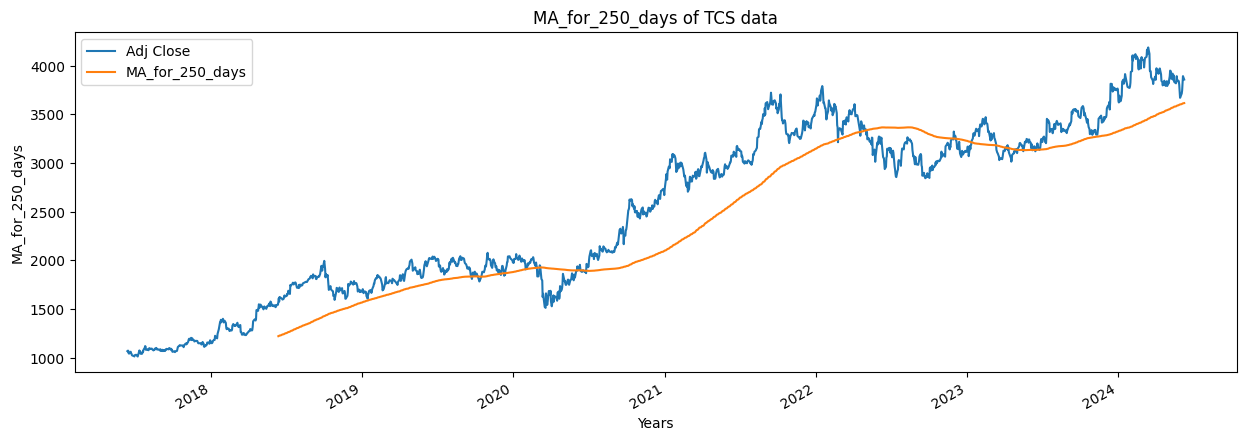

In [23]:
plot_graph((15,5), TCS_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

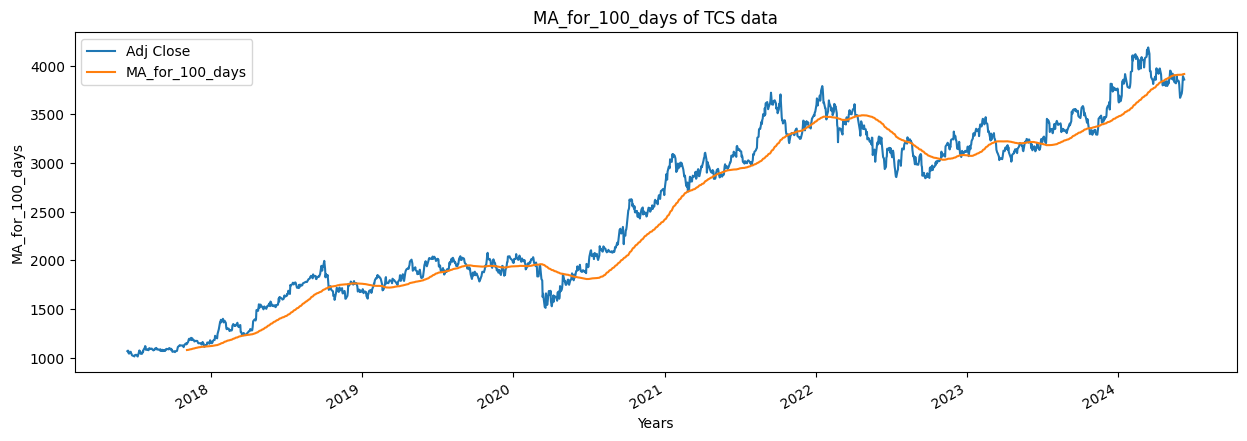

In [24]:
TCS_data['MA_for_100_days'] = TCS_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), TCS_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

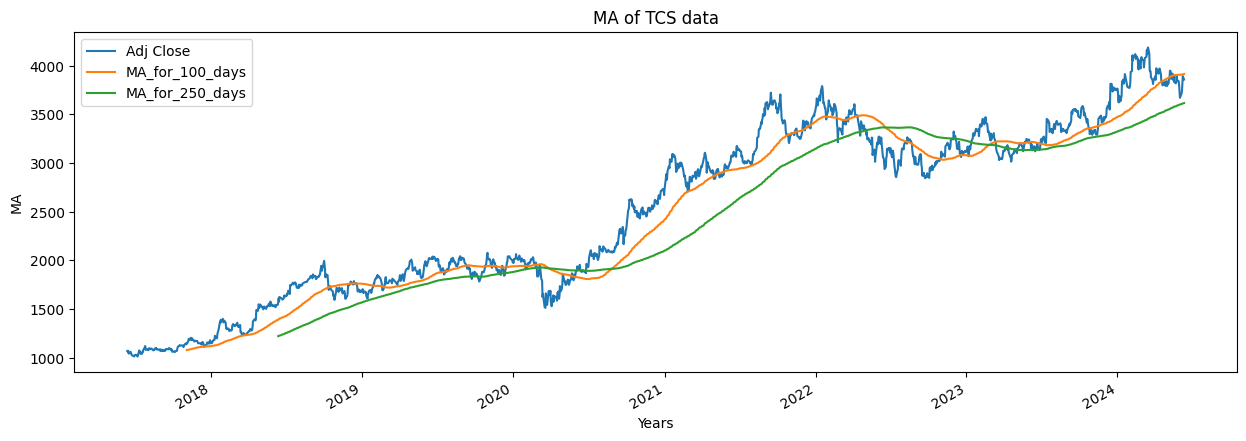

In [25]:
plot_graph((15,5), TCS_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [26]:
#TCS_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
#TCS_data[['Adj Close','percentage_change_cp']].head()

In [27]:
#plot_graph((15,5), TCS_data['percentage_change_cp']*100, 'percentage_change')

In [28]:
Adj_close_price = TCS_data[['Adj Close']]

In [29]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([4188.80517578]), array([1013.00708008]))

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.01747427],
       [0.01635954],
       [0.01891061],
       ...,
       [0.88714482],
       [0.90715555],
       [0.89605598]])

In [31]:
len(scaled_data)

1727

In [32]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [33]:
#x_data[0],y_data[0]

In [34]:

int(len(x_data)*0.7)

1138

In [35]:
4908-100-int(len(x_data)*0.7)

3670

In [36]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1138, 100, 1)
(1138, 1)
(489, 100, 1)
(489, 1)


In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [39]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\bhard\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - loss: 0.0035
Epoch 2/2
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 36s 32ms/step - loss: 0.0011


In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [43]:
predictions = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


In [44]:
#predictions

In [53]:
inv_predictions = scaler.inverse_transform(predictions)
#inv_predictions

In [46]:
inv_y_test = scaler.inverse_transform(y_test)
#inv_y_test

In [47]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [48]:
rmse

58.232544026811

In [49]:
import pandas as pd
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = TCS_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2022-06-15,3050.748291,3144.928223
2022-06-16,2989.567871,3102.394287
2022-06-17,2939.043701,3060.336914
2022-06-20,2961.403809,3017.918945
2022-06-21,3056.123779,2993.238281


<Figure size 640x480 with 0 Axes>

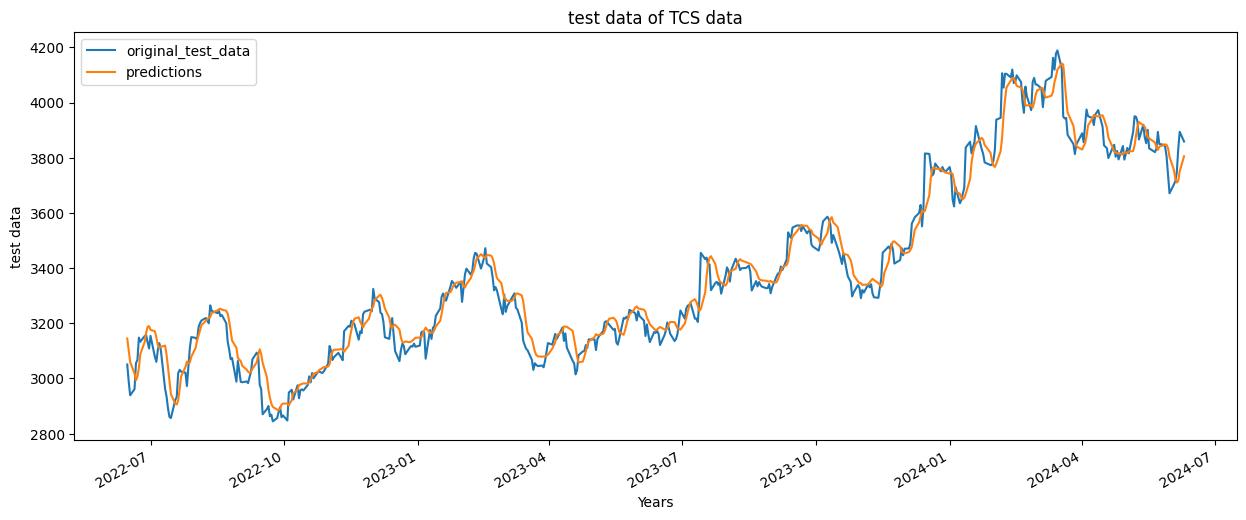

In [50]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

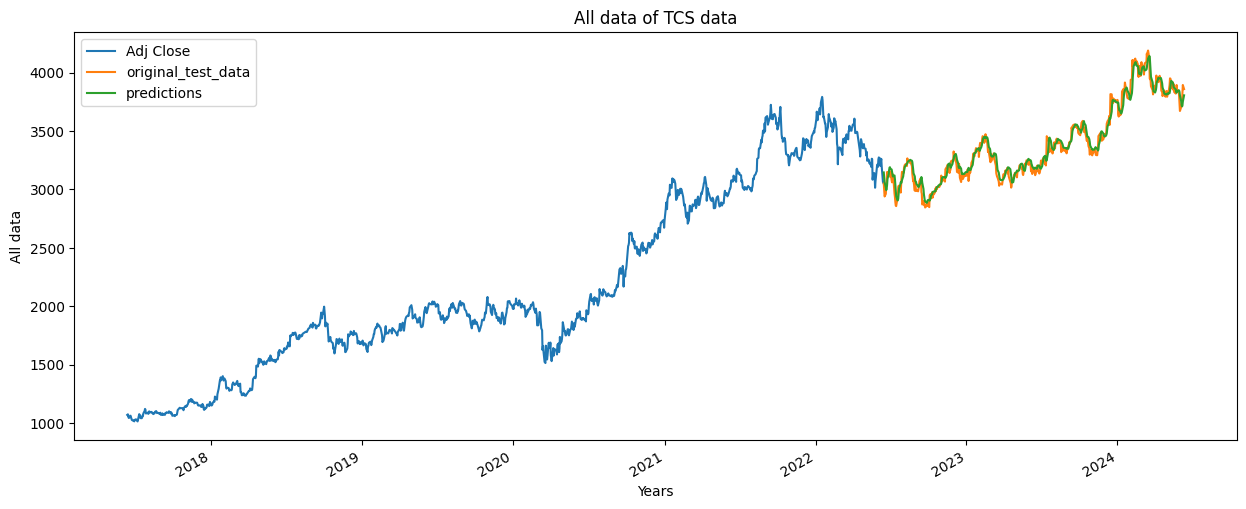

In [51]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'All data')

In [52]:
model.save("Latest_stock_price_model.h5")